In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
diabetes_data = pd.read_csv('data/diabetes_data.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [78]:
dup_col = list(diabetes_data.columns)

mask = diabetes_data.duplicated(subset=dup_col)
diabetes_duplicates = diabetes_data[mask]
print(f'Число дубликатов {diabetes_duplicates.shape[0]}')

Число дубликатов 10


In [79]:
diabetes_data_clean = diabetes_data.drop_duplicates(dup_col)
diabetes_data_clean.shape[0]

768

In [80]:
low_information_cols = [] 

for col in diabetes_data_clean.columns:
    top_freq = diabetes_data_clean[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes_data_clean[col].nunique() / diabetes_data_clean[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        
print(low_information_cols)
    

['Gender']


In [81]:
diabetes_data_clean = diabetes_data_clean.drop(low_information_cols, axis=1)

In [82]:
diabetes_data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [83]:
diabetes_data_copy = diabetes_data_clean.copy()
cols_null_percent = diabetes_data_copy.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols_with_null

Series([], dtype: float64)

In [84]:
col_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_nan:
    diabetes_data_copy[col] = diabetes_data_copy[col].replace(0, np.nan)

a = round(diabetes_data_copy['Insulin'].isna().sum() / diabetes_data_copy['Insulin'].shape[0], 2)
print(a)

0.49


Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [85]:
thresh = diabetes_data_copy.shape[0] * 0.7
diabetes_data_copy = diabetes_data_copy.dropna(thresh=thresh, axis=1)
diabetes_data_copy.shape[1]

8

In [86]:
m = diabetes_data_copy.shape[1]
diabetes_data_copy = diabetes_data_copy.dropna(thresh=m-2, axis=0)
diabetes_data_copy.shape[0]

761

In [87]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [91]:
values = {
    'Glucose': diabetes_data_copy['Glucose'].median(),
    'BloodPressure': diabetes_data_copy['BloodPressure'].median(),
    'SkinThickness': diabetes_data_copy['SkinThickness'].median(),
    'BMI': diabetes_data_copy['BMI'].median()
}

diabetes_data_copy = diabetes_data_copy.fillna(values)
round(diabetes_data_copy['SkinThickness'].mean(), 1)


29.1

In [100]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale and (data.shape[0] == data[data[feature] != 0].shape[0]):
        x = np.log(data[feature])
    elif log_scale and (data.shape[0] != data[data[feature] != 0].shape[0]):
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    left_bound = quartile_1 - left * iqr
    right_bound = quartile_3 + right * iqr
    outliers = data[(x < left_bound) | (x > right_bound)]
    cleaned = data[(x > left_bound) & (x < right_bound)]
    return outliers, cleaned

In [101]:
outliers, cleaned = outliers_iqr_mod(diabetes_data_copy, 'SkinThickness')
print(f'Число выбросов составляет: {outliers.shape[0]}')

Число выбросов составляет: 87


In [96]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale and (data.shape[0] == data[data[feature] != 0].shape[0]):
        x = np.log(data[feature])
    elif log_scale and (data.shape[0] != data[data[feature] != 0].shape[0]):
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    left_bound = mu - left * sigma
    right_bound = mu + right * sigma
    outliers_ = data[(x < left_bound) | (x > right_bound)]
    cleaned_ = data[(x > left_bound) & (x < right_bound)]
    return outliers_, cleaned_

In [98]:
outliers_, cleaned_ = outliers_z_score_mod(diabetes_data_copy, 'SkinThickness')
print(f'Число выбросов составляет: {outliers_.shape[0]}')

Число выбросов составляет: 4


In [102]:
outliers, cleaned = outliers_iqr_mod(diabetes_data_copy, 'DiabetesPedigreeFunction')
print(f'Число выбросов составляет: {outliers.shape[0]}')

Число выбросов составляет: 29


In [103]:
outliers, cleaned = outliers_iqr_mod(diabetes_data_copy, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов составляет: {outliers.shape[0]}')

Число выбросов составляет: 0


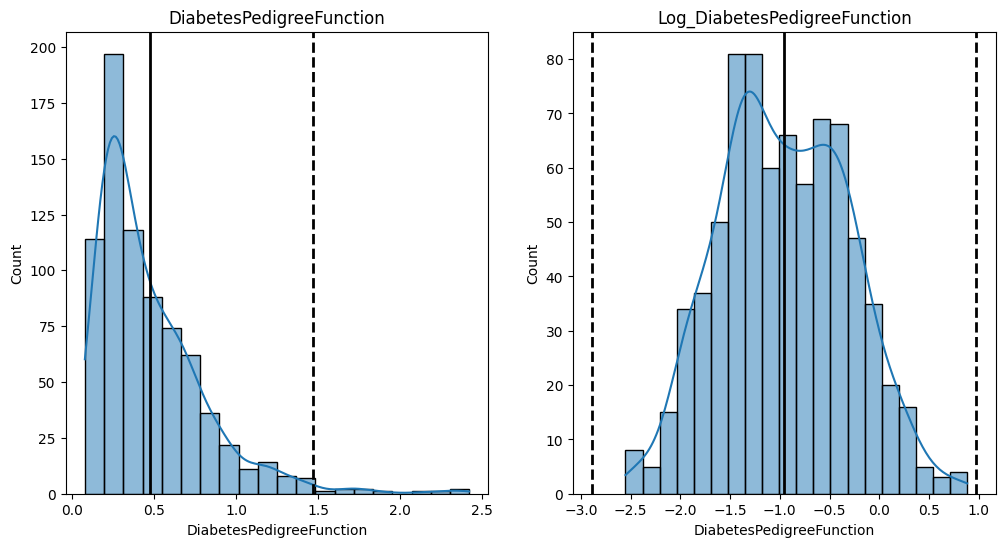

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
DPF = diabetes_data_copy['DiabetesPedigreeFunction']
histplot_ = sns.histplot(DPF, bins=20, ax=ax[0], kde = True)
histplot_.axvline(DPF.mean(), color='k', lw=2)
histplot_.axvline(DPF.mean() + 3 * DPF.std(), color='k', ls='--', lw=2)
#histplot_.axvline(DPF.mean()- 3 * DPF.std(), color='k', ls='--', lw=2)
histplot_.set_title('DiabetesPedigreeFunction');


log_DiabetesPedigreeFunction = np.log(diabetes_data_copy['DiabetesPedigreeFunction'])
histplot = sns.histplot(log_DiabetesPedigreeFunction, bins=20, ax=ax[1], kde = True)
histplot.axvline(log_DiabetesPedigreeFunction.mean(), color='k', lw=2)
histplot.axvline(log_DiabetesPedigreeFunction.mean()+ 3 * log_DiabetesPedigreeFunction.std(), color='k', ls='--', lw=2)
histplot.axvline(log_DiabetesPedigreeFunction.mean()- 3 * log_DiabetesPedigreeFunction.std(), color='k', ls='--', lw=2)
histplot.set_title('Log_DiabetesPedigreeFunction');